This notebook is for checking the converted TFRecords data and visualizing

## Imports, constants and path

In [2]:
import tensorflow as tf
import numpy as np
import pickle 
import read_tfrecord
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

BATCH_SIZE = 100
TRAIN_TFRECORD_PATH = "/home/hpc/github/has_practice/dataset/tfrecords/train"
VALID_TFRECORD_PATH = "/home/hpc/github/has_practice/dataset/tfrecords/valid"
TEST_TFRECORD_PATH = "/home/hpc/github/has_practice/dataset/tfrecords/test"

## Check dataset and visualize

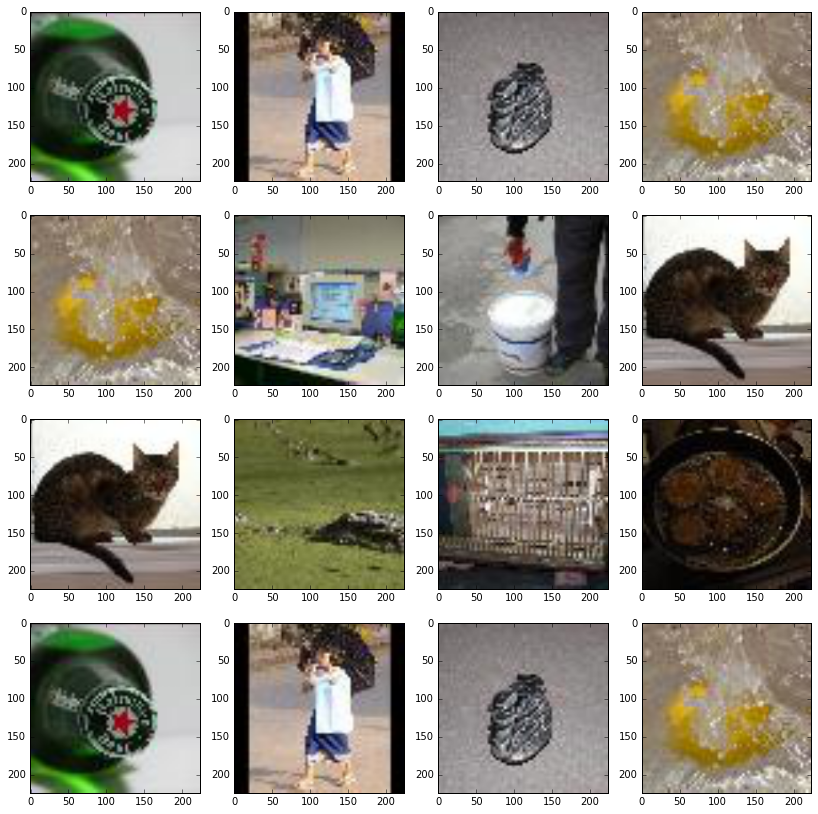

In [4]:
""" Check dataset (train, validation, test)    

"""
g = tf.Graph()
with g.as_default():
    read_data_dict = read_tfrecord.read_tfrecord(tfrecord_train_dir=TRAIN_TFRECORD_PATH,
                                                tfrecord_valid_dir=VALID_TFRECORD_PATH,
                                                tfrecord_test_dir=TEST_TFRECORD_PATH,
                                                batch_size=BATCH_SIZE) 
   
    sess = tf.Session()
    sess.run(read_data_dict['data_initializer_train'])
    X_raw = sess.run(read_data_dict['X'])
    X_restored = X_raw * 0.5
    X_restored += 0.5
    X_restored = X_restored * 255
    X_restored = X_restored.astype(np.uint8)
    fig, axes = plt.subplots(4, 4, figsize=(14,14))
    for y in range(4):
        for x in range(4):
            axes[y][x].imshow(X_restored[x+(y%3)*3])